## algorithm design and anlysis-2025 spring  homework 3
**Deadline**：2025.5.14

**name**:吴志祥


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

请证明基于比较的排序算法计算复杂度下界为$\Omega(nlogn)$

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：/fig/h3_1.jpg

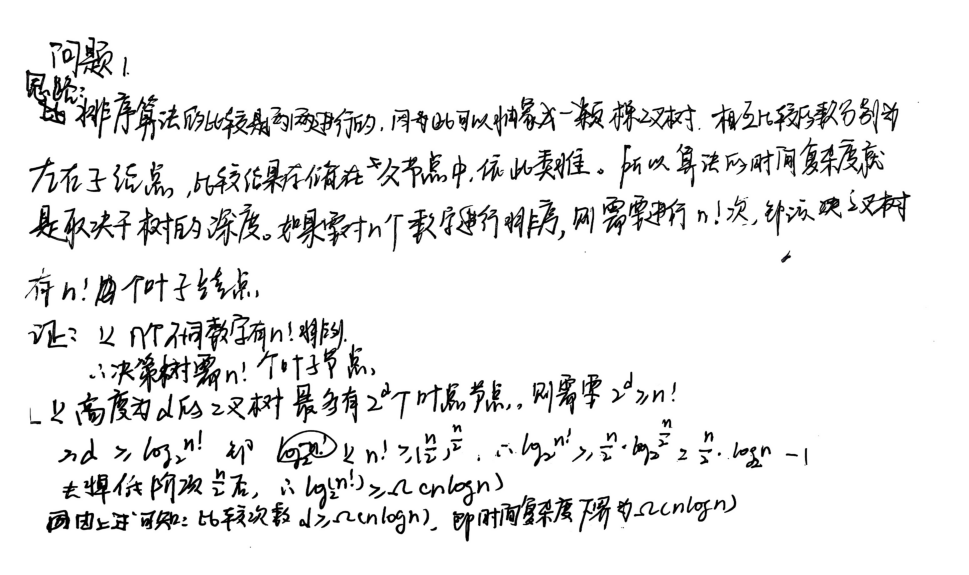

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread("./fig/h3_1.jpg")


plt.figure(dpi=200)  
plt.imshow(img)
plt.axis("off")  
plt.show()

## 问题 2 

构建二叉搜索树

> 1. 给定一个数组 [48, 33, 49, 47, 42, 46, 32], 构建一个二叉搜索树存储这些数据，请**绘制**所构建的**二叉搜索树**（标明结点的值）。
> 2. 从第1问的二叉搜索树中删除33，请**绘制**删除33后的**二叉搜索树**（标明结点的值）

- 推荐使用graphviz包绘制树的结构

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：/fig/h3_2.jpg

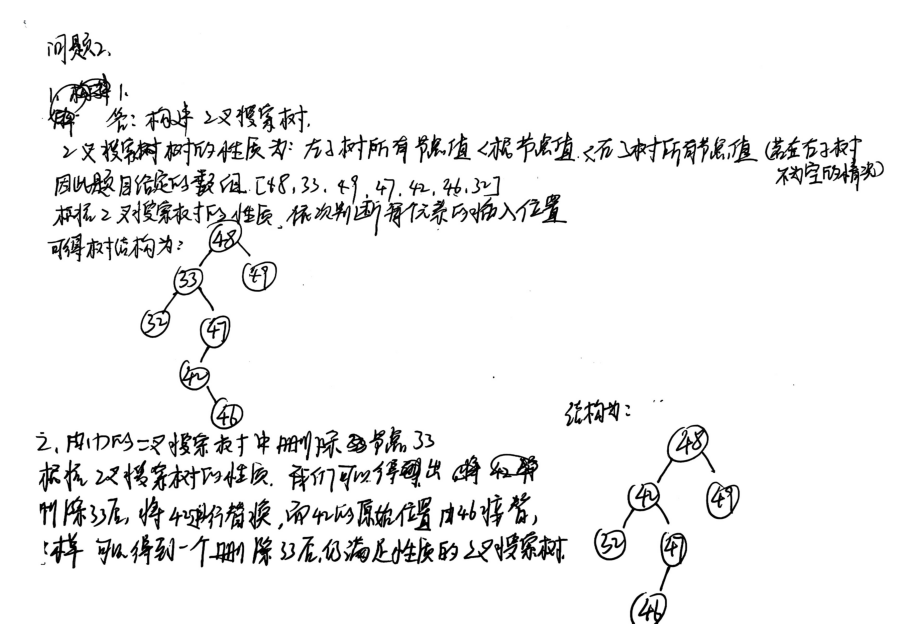

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread("./fig/h3_2.jpg")


plt.figure(dpi=200)  
plt.imshow(img)
plt.axis("off")  
plt.show()

## 问题 3 

> 下面是九门课程的开始和结束时间:
>
> [(9:00,12:30), (11:00,14:00), (13:00, 14:30), (9:00,10:30),(13:00, 14:30),(14:00,16:30), (15:00,16:30), (15:00,16:30), (9:00,10:30)]
>
> 请使用贪婪算法为这九门课分配教室，要求在同一天内安排这些课，并且每个教室同一时间只能安排一门课。

**请问最少需要几间教室，罗列出每个教室安排的课程**

idea：本题采用贪婪算法。先按课程结束时间排序，优先挑结束早的课安排，这样能尽早腾出教室，尽量减少需要的教室数。每次把课塞进第一个时间不冲突的教室，如果没教室能放就开个新的，最后输出最少教室数和每个教室的课程列表。

In [2]:
# 转成分钟
def to_minutes(time_str):
    h, m = map(int, time_str.split(":"))
    return h * 60 + m

# 课程列表
courses = [
    ("9:00", "12:30"), ("11:00", "14:00"), ("13:00", "14:30"),
    ("9:00", "10:30"), ("13:00", "14:30"), ("14:00", "16:30"),
    ("15:00", "16:30"), ("15:00", "16:30"), ("9:00", "10:30")
]

# 转成分钟并排序
courses_with_index = []
for idx, (start, end) in enumerate(courses):
    start_min = to_minutes(start)
    end_min = to_minutes(end)
    courses_with_index.append((start_min, end_min, idx + 1))

# 按结束时间排序，结束时间相同按开始时间排序
courses_with_index.sort(key=lambda x: (x[1], x[0]))

classrooms = []  # 课表(start, end, idx)
for start, end, idx in courses_with_index:
    # 找一个能放的教室
    placed = False
    for room in classrooms:
        last_end = room[-1][1]  # 教室最后一门课的结束时间
        if start >= last_end: 
            room.append((start, end, idx))
            placed = True
            break
    if not placed: 
        classrooms.append([(start, end, idx)])

print("最少需要教室数:", len(classrooms))
for i, room in enumerate(classrooms, 1):
    room_courses = [f"课程{c[2]}" for c in room]
    print(f"教室 {i}: {room_courses}")

# your algorithm time complexity is: 课程的时间转换和按结束时间排序是 O(n log n)，分配教室时，每门课检查最多 k 个教室，其复杂度为 O(n*k)
# 因此总的时间复杂度以排序为主，为O(nlogn)。

最少需要教室数: 3
教室 1: ['课程4', '课程2', '课程6']
教室 2: ['课程9', '课程3', '课程7']
教室 3: ['课程1', '课程5', '课程8']


## 问题 4 

> 爬楼梯问题：假设爬楼梯时你每次只能爬一阶或者爬两阶，问爬上n阶的楼梯，你一共有多少种方法

请设计算法完成该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：使用动态规划定义 dp[i] 为爬到第 i 阶的方法数，通过状态转移 dp[i] = dp[i-1] + dp[i-2]（从 i-1 爬 1 阶或 i-2 爬 2 阶）计算，初始条件为 dp[0] = 1 和 dp[1] = 1。

In [1]:
# add your code here
def climb_stairs(n):
    if n <= 1:
        return 1
    
    # dp[i] 表示爬到第i阶的方法数
    dp = [0] * (n + 1)
    dp[0] = 1  
    dp[1] = 1 
    
    # 递推
    for i in range(2, n + 1):
        dp[i] = dp[i-1] + dp[i-2]  # 从i-1爬1阶 或 从i-2爬2阶
    
    return dp[n]
if __name__ == "__main__":

    print("n=2 时，方法数：", climb_stairs(2))  
    print("n=3 时，方法数：", climb_stairs(3))  
    print("n=5 时，方法数：", climb_stairs(5))  #
# your algorithm time complexity is: 遍历0到n，时间复杂度为O(n)；每次计算为O(1),因此总的时间复杂度为O(n)

n=2 时，方法数： 2
n=3 时，方法数： 3
n=5 时，方法数： 8


## 问题 5 

> 0-1背包问题：现在有4块大理石，每个大理石对应的重量和价值使用一个元组表示, 即（重量，价值），4块大理石的重量和价值为：[(5,10), (4,40), (6,30), (3, 50)], 假设你有一辆最大承重为9的小推车，请问使用这个小推车装大理石的最大价值为多少

请设计一个算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：使用动态规划定义 dp[i][w] 为前 i 个物品在容量 w 下的最大价值，通过不选或选第 i 个物品，取得最大值，最终得到为 dp[n][capacity]。

In [2]:
# add your code here
def knapsack(weights, values, capacity):
    n = len(weights)
    # dp[i][w] 表示前i个物品，容量w时的最大价值
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            # 不选第i个物品
            dp[i][w] = dp[i-1][w]
            # 选第i个物品（如果放得下）
            if w >= weights[i-1]:
                dp[i][w] = max(dp[i][w], dp[i-1][w - weights[i-1]] + values[i-1])
    
    return dp[n][capacity]

if __name__ == "__main__":
    marbles = [(5, 10), (4, 40), (6, 30), (3, 50)]
    weights = [w for w, v in marbles]
    values = [v for w, v in marbles]
    capacity = 9
    print("小推车承重:", capacity)
    max_value = knapsack(weights, values, capacity)
    print("最大价值 =", max_value) 

# your algorithm time complexity is:动态规划的表格大小为 (n+1) × (capacity+1)，因此总的时间复杂度为O(n × capacity)
# 在这里的时间复杂度就为O(4*9)=O(36)

小推车承重: 9
最大价值 = 90


## 问题 6 
给定 `n` 个非负整数表示每个宽度为 `1` 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。



<div style="text-align:center;width:800px;"> <img alt="" src="./fig/hw3q6.png"> </div>

请分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：雨水能接在凹槽处，取决于左右两侧最高柱子中的较小值与当前柱子高度的差，使用双指针法从两端向中间移动，维护 left_max 和 right_max 记录左右最高柱子高度。每次移动时，若 left_max < right_max，处理左指针计算雨水或更新 left_max，否则处理右指针计算雨水或更新 right_max，直到指针相遇。

In [3]:
# add your code here
def trap(height):
    if not height:  
        return 0
    
    n = len(height)
    left, right = 0, n - 1  # 左右指针
    left_max, right_max = 0, 0  # 左右最高柱子
    water = 0  # 存雨水量
    
    while left < right:  # 指针没相遇就继续
        # 更新左右最大值
        left_max = max(left_max, height[left])
        right_max = max(right_max, height[right])
        
        # 看哪边低就处理哪边
        if left_max < right_max:
            water += left_max - height[left]  # 左边能接多少水
            left += 1  
        else:
            water += right_max - height[right]  # 右边能接多少水
            right -= 1 
    
    return water

if __name__ == "__main__":
    height1 = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
    height2 = [4, 2, 0, 3, 2, 5]
    print("高度1:", height1)
    print("接雨水量 =", trap(height1)) 
    print("高度2:", height2)
    print("接雨水量 =", trap(height2))
# your algorithm time complexity is: 双指针遍历数组一次，O(n)

高度1: [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
接雨水量 = 6
高度2: [4, 2, 0, 3, 2, 5]
接雨水量 = 9


## 问题 7 

**股票投资组合优化**： 假设你是一位投资者，想要在不同的股票中分配你的资金，以最大化你的投资回报。每只股票都有不同的预期收益率和风险。你的目标是选择一些股票，使得总投资金额不超过你的预算，并且预期收益最大化。

在这个情况下，你可以将每只股票视为一个“物品”，其重量为投资金额，价值为预期收益率。然后，你可以使用分级背包问题的方法来选择部分股票，以便在预算内获得最大的预期收益。

以下是一个简化的例子：

假设你有以下三只股票可供选择：

1. 股票 A：投资金额 5000 美元，预期收益率 10%
2. 股票 B：投资金额 3000 美元，预期收益率 8%
3. 股票 C：投资金额 2000 美元，预期收益率 12%

请设计算法找到最优投资方案，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：使用动态规划定义 `dp[i][w]` 为前 `i` 只股票在预算 `w` 时的最大收益，通过不选或选第 `i` 只股票来计算最大值，最后回溯确定选择的股票。

In [1]:
# add your code here
def stock_investment(costs, rates, budget):
    n = len(costs)
    # 实际收益
    returns = []
    for i in range(n):
        profit = costs[i] * rates[i] / 100
        returns.append(profit)
    
    # dp[i][w] 是前i只股票，预算w时的最大收益
    dp = []
    for i in range(n + 1):
        row = [0] * (budget + 1)
        dp.append(row)
    # 填表
    for i in range(1, n + 1):
        for w in range(budget + 1):
            dp[i][w] = dp[i-1][w]
            if w >= costs[i-1]:
                dp[i][w] = max(dp[i][w], dp[i-1][w - costs[i-1]] + returns[i-1])
    
    # 回溯，看选了哪些股票
    selected = []
    w = budget
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:  
            selected.append(i)
            w = w - costs[i-1]
    
    return dp[n][budget], selected[::-1]  

if __name__ == "__main__":
    stocks = [("A", 5000, 10), ("B", 3000, 8), ("C", 2000, 12)]
    costs = []
    rates = []
    for name, cost, rate in stocks:
        costs.append(cost)
        rates.append(rate)
    budget = 10000  
    print("股票:", stocks)
    print("预算:", budget)
    max_profit, selected = stock_investment(costs, rates, budget)
    print("最大收益 =", max_profit)
    # 打印选了哪些股票
    selected_names = []
    for idx in selected:
        selected_names.append(stocks[idx-1][0])
    print("选的股票 =", selected_names)
    
# your algorithm time complexity is:动态规划的表格大小是(n+1) × (budget+1)，因此总的时间复杂度为O(n*budget)

股票: [('A', 5000, 10), ('B', 3000, 8), ('C', 2000, 12)]
预算: 10000
最大收益 = 980.0
选的股票 = ['A', 'B', 'C']


## 问题 8

给你二叉搜索树的根节点 root ，该树中的恰好两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。设计算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

<div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入：root = [1,3,null,null,2]， 输出为：[3,1,null,null,2]， 

解释：3 不能是 1 的左孩子，因为 3 > 1 。交换 1 和 3 使二叉搜索树有效。

2.

 <div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入： root=[3,1,4,null,null,2]， 输出为：[2,1,4,null,null,3]

解释：2 不能在 3 的右子树中，因为 2 < 3 。交换 2 和 3 使二叉搜索树有效。

idea：通过中序遍历 BST（应为升序），记录前一节点 prev 和当前节点 curr，找到两个不符合升序的错误点（第一个错误设置 first = prev 和 second = curr，第二个错误更新 second = curr），最后交换 first.val 和 second.val

In [3]:
# add your code here
# 参考了大模型解决该模型，在此注明（参考了大模型）
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def recover_bst(root):
    # 用列表存类变量
    first = [None]
    second = [None]
    prev = [None]
    def inorder(node):
        if not node:
            return
        # 左子树
        inorder(node.left)
        # 处理当前节点
        if prev[0] and prev[0].val > node.val:
            # 第一个错误点
            if not first[0]:
                first[0] = prev[0]
                second[0] = node
            # 第二个错误点
            else:
                second[0] = node
        prev[0] = node
        
        # 右子树
        inorder(node.right)
    # 中序遍历找错误节点
    inorder(root)
    # 交换两个节点的值
    first[0].val, second[0].val = second[0].val, first[0].val
    return root

# 测试
def build_tree(values):
    if not values:
        return None
    root = TreeNode(values[0])
    queue = [root]
    i = 1
    while queue and i < len(values):
        node = queue.pop(0)
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1
    return root

def print_tree(root):
    if not root:
        return []
    result = []
    queue = [root]
    while queue:
        node = queue.pop(0)
        if node:
            result.append(node.val)
            queue.append(node.left)
            queue.append(node.right)
        else:
            result.append(None)
    while result and result[-1] is None:
        result.pop()
    return result

if __name__ == "__main__":
    root1 = build_tree([1, 3, None, None, 2])
    root2 = build_tree([3, 1, 4, None, None, 2])
    print("输入1:", print_tree(root1))
    recover_bst(root1)
    print("输出:", print_tree(root1))
    print("输入2:", print_tree(root2))
    recover_bst(root2)
    print("输出:", print_tree(root2))
# your algorithm time complexity is:中序遍历一次，有n个节点，因此总的时间复杂度为O(n)

输入1: [1, 3, None, None, 2]
输出: [3, 1, None, None, 2]
输入2: [3, 1, 4, None, None, 2]
输出: [2, 1, 4, None, None, 3]


## 问题 9  

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。每条从根节点到叶节点的路径都代表一个数字：

> 例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。

设计一个算法计算从根节点到叶节点生成的所有数字之和 ，分析算法设计思路，计算时间复杂度，并基于python编程实现

叶节点:是指没有子节点的节点。

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-1.jpg"> </div>

 输入：root = [1,2,3], 输出：25

解释：从根到叶子节点路径 1->2 代表数字 12，1->3 代表数字 13，因此和为 12 + 13 = 25 。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-2.jpg"> </div>

 输入：root = [4,9,0,5,1], 输出：1026

解释：从根到叶子节点路径 4->9->5 代表数字 495，4->9->1 代表数字 491，4->0 代表数字 40。因此和为 495 + 491 + 40 = 1026 。

idea：使用深度优先搜索（DFS）遍历所有根到叶路径。在遍历时维护当前路径的数字（每次向下走，数字乘 10 加上当前节点值），到达叶节点时累加到总和。

In [5]:
# add your code here
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def sum_numbers(root):
    if not root:
        return 0
    
    total = [0]  # 用列表存总和
    
    def dfs(node, curr_num):
        if not node:
            return
        
        # 当前路径的数字
        curr_num = curr_num * 10 + node.val
        
        # 如果是叶节点，累加到总和
        if not node.left and not node.right:
            total[0] += curr_num
            return
        
        # 递归左右子树
        dfs(node.left, curr_num)
        dfs(node.right, curr_num)
    
    dfs(root, 0)
    return total[0]

def build_tree(values):
    if not values:
        return None
    root = TreeNode(values[0])
    queue = [root]
    i = 1
    while queue and i < len(values):
        node = queue.pop(0)
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1
    return root

def print_tree(root):
    if not root:
        return []
    result = []
    queue = [root]
    while queue:
        node = queue.pop(0)
        if node:
            result.append(node.val)
            queue.append(node.left)
            queue.append(node.right)
        else:
            result.append(None)
    while result and result[-1] is None:
        result.pop()
    return result

if __name__ == "__main__":
    root1 = build_tree([1, 2, 3])
    root2 = build_tree([4, 9, 0, 5, 1])
    print("输入1:", print_tree(root1))
    print("输出:", sum_numbers(root1))  
    print("输入2:", print_tree(root2))
    print("输出:", sum_numbers(root2))  

# your algorithm time complexity is:遍历每个节点一次，n个节点即为O(n),因此总时间复杂度就为O(n)

输入1: [1, 2, 3]
输出: 25
输入2: [4, 9, 0, 5, 1]
输出: 1026


## 问题 10  

给你一个二叉树的根节点 root ， 检查它是否轴对称。

1. 分析算法设计思路，计算时间复杂度，并基于python编程实现
2. \* 设计使用递归和迭代两种方法解决这个问题，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-1.png"> </div>

 输入：root = [1,2,2,3,4,4,3]， 输出：true

解释：二叉树 [1,2,2,3,4,4,3] 对称。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-2.png"> </div>

 输入：root = [1,2,2,null,3,null,3]， 输出：false

idea：使用递归检查左右子树是否镜像对称，两个子树对称需满足：根节点值相同；左子树的左孩子与右子树的右孩子对称，左子树的右孩子与右子树的左孩子对称通过递归比较左右子树的对称性

In [4]:
# add your code here
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def is_symmetric(root):
    if not root:
        return True
    
    def check(left, right):
        # 都为空，对称
        if not left and not right:
            return True
        # 一个为空，一个不为空，不对称
        if not left or not right:
            return False
        # 值不同，不对称
        if left.val != right.val:
            return False
        # 左的左和右的右，左的右和右的左
        return check(left.left, right.right) and check(left.right, right.left)
    
    return check(root.left, root.right)

def build_tree(values):
    if not values:
        return None
    root = TreeNode(values[0])
    queue = [root]
    i = 1
    while queue and i < len(values):
        node = queue.pop(0)
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1
    return root

def print_tree(root):
    if not root:
        return []
    result = []
    queue = [root]
    while queue:
        node = queue.pop(0)
        if node:
            result.append(node.val)
            queue.append(node.left)
            queue.append(node.right)
        else:
            result.append(None)
    while result and result[-1] is None:
        result.pop()
    return result

if __name__ == "__main__":
    root1 = build_tree([1, 2, 2, 3, 4, 4, 3])
    root2 = build_tree([1, 2, 2, None, 3, None, 3]) 
    print("输入1:", print_tree(root1))
    print("输出:", is_symmetric(root1))  
    print("输入2:", print_tree(root2))
    print("输出:", is_symmetric(root2))  
    
# your algorithm time complexity is:遍历每个节点一次，因此总时间复杂度为O(n)

输入1: [1, 2, 2, 3, 4, 4, 3]
输出: True
输入2: [1, 2, 2, None, 3, None, 3]
输出: False


## 问题 11  

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.
输入：grid = [

    ["1","1","1","1","0"],

    ["1","1","0","1","0"], 

    ["1","1","0","0","0"], 

    ["0","0","0","0","0"]  

]

输出：1

2.
输入：grid = [

    ["1","1","0","0","0"],

    ["1","1","0","0","0"],

    ["0","0","1","0","0"],

    ["0","0","0","1","1"]

]

输出：3

idea:使用深度优先搜索（DFS）遍历每个岛屿。遇到 1（陆地）时，启动 DFS 将相连的所有陆地标记为访问过（改为 0），并计数岛屿数。同时每个未访问的 1 代表一个新岛屿。

In [6]:
# add your code here
def num_islands(grid):
    if not grid:
        return 0
    
    m = len(grid)  # 行数
    n = len(grid[0])  # 列数
    islands = 0  # 岛屿计数
    
    def dfs(i, j):
        # 越界或不是陆地
        if i < 0 or i >= m or j < 0 or j >= n or grid[i][j] == "0":
            return
        # 标记为访问过
        grid[i][j] = "0"
        # 四个方向递归
        dfs(i-1, j)  # 上
        dfs(i+1, j)  # 下
        dfs(i, j-1)  # 左
        dfs(i, j+1)  # 右
    
    for i in range(m):
        for j in range(n):
            if grid[i][j] == "1":
                islands += 1
                dfs(i, j)  # 标记整个岛屿
    
    return islands

if __name__ == "__main__":
    grid1 = [
        ["1","1","1","1","0"],
        ["1","1","0","1","0"],
        ["1","1","0","0","0"],
        ["0","0","0","0","0"]
    ]
    grid2 = [
        ["1","1","0","0","0"],
        ["1","1","0","0","0"],
        ["0","0","1","0","0"],
        ["0","0","0","1","1"]
    ]
    print("输入:", grid1)
    print("输出:", num_islands(grid1)) 
    print("输入:", grid2)
    print("输出:", num_islands(grid2)) 

# your algorithm time complexity is:遍历网格为m行，n列，且每个位置最多被访问一次，因此总的时间复杂度为O(m*n)=O(mn)

输入: [['1', '1', '1', '1', '0'], ['1', '1', '0', '1', '0'], ['1', '1', '0', '0', '0'], ['0', '0', '0', '0', '0']]
输出: 1
输入: [['1', '1', '0', '0', '0'], ['1', '1', '0', '0', '0'], ['0', '0', '1', '0', '0'], ['0', '0', '0', '1', '1']]
输出: 3
